In [1]:
%matplotlib inline
import seaborn as sns
from IPython.core.pylabtools import figsize
figsize(14, 7)

In [2]:
import pandas as pd
import numpy as np
import pylab as py

In [3]:
data_reviews = pd.read_csv("/data/datasets/social/yelp/yelp_review.csv")
data_business = pd.read_csv("/data/datasets/social/yelp/yelp_business.csv")
data = data_reviews.merge(data_business, on='business_id', suffixes=('_review', '_business'))
del data_reviews
del data_business

In [4]:
data.head()

,review_id,user_id,business_id,stars_review,date,text,useful,funny,cool,name,...,address,city,state,postal_code,latitude,longitude,stars_business,review_count,is_open,categories
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0,"""Wilensky's""",...,"""34 Avenue Fairmount Ouest""",Montréal,QC,H2T 2M1,45.523333,-73.594859,4.0,84,1,Diners;Food;Restaurants;Delis
1,vm1b1keOzwHjtGZEPPuYXA,xYciRtVZ1PW4IxSX4oJ1aw,AEx2SYEUJmTxVVB18LlCwA,5,2016-02-22,*The shop was featured on Mind of a Chef with ...,4,3,4,"""Wilensky's""",...,"""34 Avenue Fairmount Ouest""",Montréal,QC,H2T 2M1,45.523333,-73.594859,4.0,84,1,Diners;Food;Restaurants;Delis
2,SXwA9KZ-Nc_hMARk_3cJ7g,5Ymfsf9fAYz-Ds_p0xawVQ,AEx2SYEUJmTxVVB18LlCwA,5,2013-03-29,"As its name suggests, Wilensky's is a lunch co...",9,0,3,"""Wilensky's""",...,"""34 Avenue Fairmount Ouest""",Montréal,QC,H2T 2M1,45.523333,-73.594859,4.0,84,1,Diners;Food;Restaurants;Delis
3,jUzausdZ_ujqe_n8BlBj-g,DVOOF0Z627DyrZ4XKQbTgA,AEx2SYEUJmTxVVB18LlCwA,5,2017-08-08,"Stopped by for the Wilensky's Special, loved i...",0,0,0,"""Wilensky's""",...,"""34 Avenue Fairmount Ouest""",Montréal,QC,H2T 2M1,45.523333,-73.594859,4.0,84,1,Diners;Food;Restaurants;Delis
4,oCRDwF3tszAkeszSfxwthg,5JoKz3mU42Cp906KRXDwJw,AEx2SYEUJmTxVVB18LlCwA,4,2009-01-17,"I have to admit, I am a fan. Just entering the...",4,0,1,"""Wilensky's""",...,"""34 Avenue Fairmount Ouest""",Montréal,QC,H2T 2M1,45.523333,-73.594859,4.0,84,1,Diners;Food;Restaurants;Delis


In [5]:
data.describe()

,stars_review,useful,funny,cool,latitude,longitude,stars_business,review_count,is_open
count,5.261668e+06,5.261668e+06,5.261668e+06,5.261668e+06,5.261643e+06,5.261643e+06,5.261668e+06,5.261668e+06,5.261668e+06
mean,3.727739e+00,1.385085e+00,5.091961e-01,5.860917e-01,3.731548e+01,-1.008361e+02,3.730661e+00,3.501504e+02,8.825796e-01
std,1.433593e+00,4.528727e+00,2.686168e+00,2.233706e+00,4.328716e+00,2.073080e+01,7.420560e-01,7.356107e+02,3.219206e-01
min,1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-3.608601e+01,-1.424666e+02,1.000000e+00,3.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.361132e+01,-1.151540e+02,3.500000e+00,3.300000e+01,1.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.610789e+01,-1.119615e+02,4.000000e+00,1.080000e+02,1.000000e+00
75%,5.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,4.045035e+01,-8.085488e+01,4.000000e+00,3.260000e+02,1.000000e+00
max,5.000000e+00,3.364000e+03,1.481000e+03,1.105000e+03,8.999931e+01,1.150868e+02,5.000000e+00,7.361000e+03,1.000000e+00


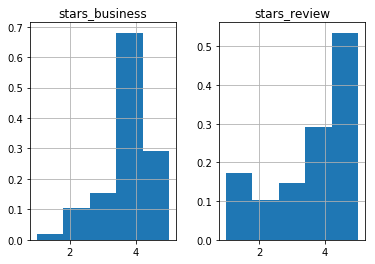

In [6]:
data[['stars_review', 'stars_business']].hist(bins=5, density=True);

In [7]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(
    data, 
    test_size=0.20,
    random_state=42
)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

tfidf = TfidfVectorizer(max_features=100000, ngram_range=(1, 2), max_df=2.0/3.0, binary=True)
logit = LogisticRegression(class_weight='balanced', C=0.1)
model = Pipeline([('tfidf', tfidf), ('logit', logit)])

In [9]:
model.fit(data_train.text, data_train.stars_review)
model.score(data_test.text, data_test.stars_review)

0.700347988376314

In [10]:
from sklearn.metrics import confusion_matrix

pred = model.predict(data_test.text)
confusion_all = confusion_matrix(data_test.stars_review, pred)
confusion_all = confusion_all / confusion_all.sum(axis=1)[:, np.newaxis]

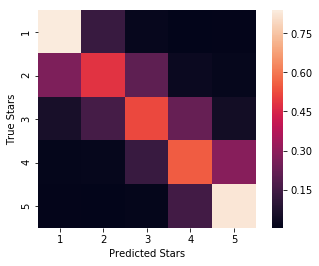

In [11]:
sns.heatmap(confusion_all, xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5], square=True)
py.xlabel('Predicted Stars')
py.ylabel('True Stars');

<BarContainer object of 5 artists>

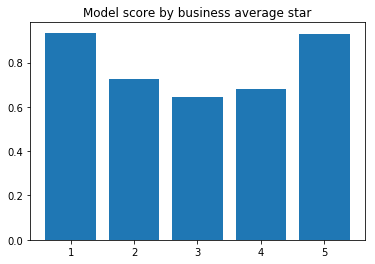

In [12]:
scores = []
for star in range(1, 6):
    d = data_test[data_test.stars_business == star]
    scores.append(model.score(d.text, d.stars_review))
py.title("Model score by business average star")
py.bar(range(1, 6), scores)

In [13]:
categories = set(cat for cats in data_test.categories.values for cat in cats.split(';'))

In [14]:
category_scores = {}
for cat in categories:
    d = data_test[data_test.categories.str.contains(cat, regex=False)]
    category_scores[cat] = (model.score(d.text, d.stars_review), d)

In [15]:
category_scores_sort = sorted(category_scores.items(), key=lambda x: x[1][0])

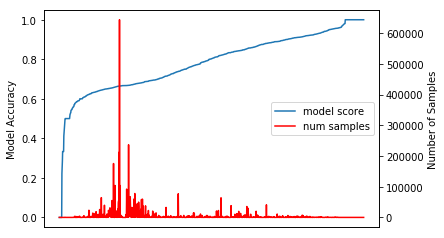

In [18]:
lns1 = py.gca().plot([c[1][0] for c in category_scores_sort], label='model score')
py.ylabel("Model Accuracy")
ax2 = py.gca().twinx()
lns2 = ax2.plot([c[1][1].shape[0] for c in category_scores_sort], c='r', label='num samples')
py.ylabel("Number of Samples")

lns = lns1+lns2
labs = [l.get_label() for l in lns]
py.legend(lns, labs, loc='center right')
py.xticks([], []);

In [17]:
data_test.categories.values[:10]

array(['Pet Services;Pet Sitting;Pets;Veterinarians',
       'Bars;Nightlife;Dance Clubs;Gay Bars',
       'Chinese;Japanese;Buffets;Restaurants;Sushi Bars',
       'Food;Mediterranean;Food Trucks;Restaurants',
       'Vietnamese;Restaurants',
       'Bars;Mexican;Cocktail Bars;Restaurants;Nightlife',
       'Medical Centers;Cannabis Clinics;Doctors;Naturopathic/Holistic;Health & Medical',
       'Food;Specialty Food;Organic Stores;Vegan;Restaurants;Gluten-Free;Juice Bars & Smoothies',
       'Museums;Local Flavor;Arts & Entertainment',
       'Bars;Tapas/Small Plates;Beer;Wine & Spirits;Restaurants;Gastropubs;Food;Burgers;American (New);American (Traditional);Nightlife'],
      dtype=object)